# IMPORT LIBRARY

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

# IMPORT DATA

In [5]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/MPG.csv')

In [6]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [7]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# DATA PREPROCESSING

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [9]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [10]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


# REMOVE MISSING VALUES

In [11]:
df = df.dropna()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


# DATA VISUALIZATION

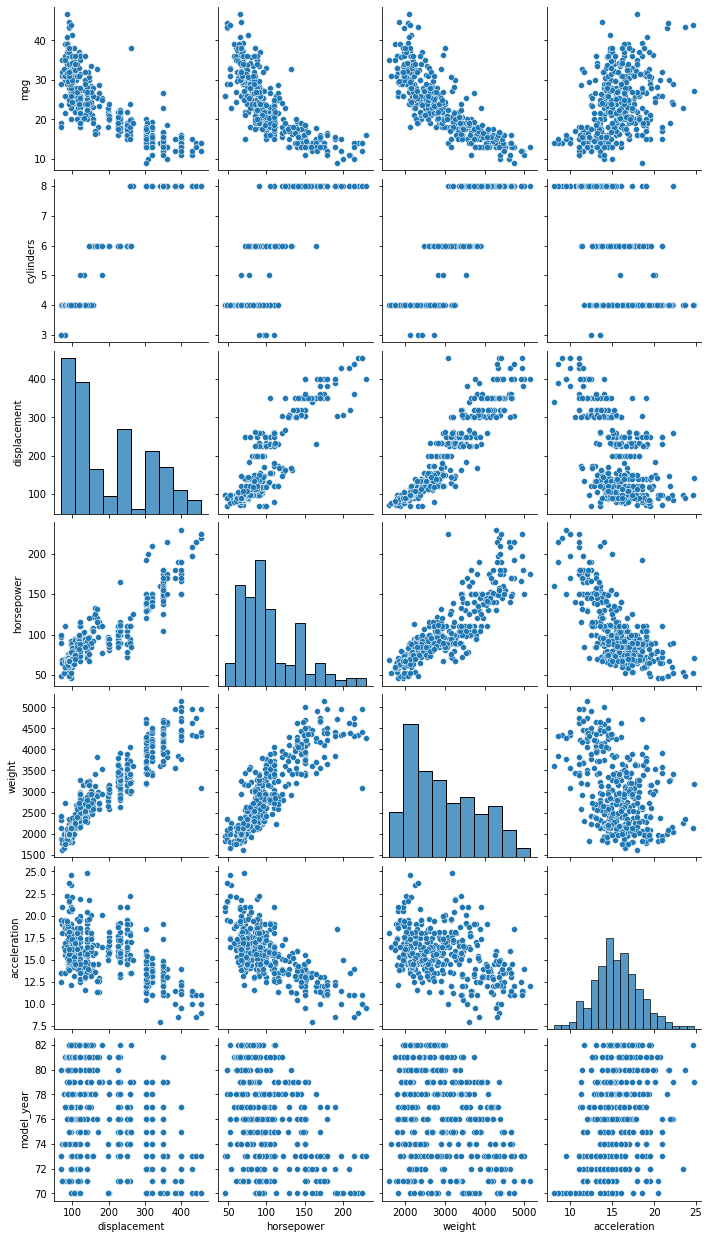

In [13]:
sns.pairplot(df,x_vars= ['displacement','horsepower','weight', 'acceleration'])

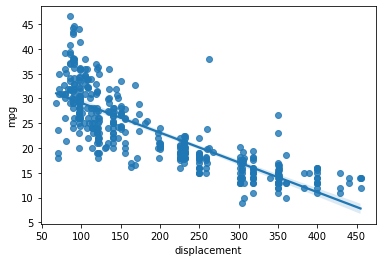

In [14]:
sns.regplot(x ='displacement', y='mpg', data = df);

# DEFINE X AND Y

In [15]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [16]:
y=df['mpg']

In [17]:
y.shape

(392,)

In [18]:
X=df[['displacement','horsepower','weight','acceleration']]

In [19]:
X.shape

(392, 4)

# SCALING DATA

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
ss=StandardScaler()

In [22]:
X=ss.fit_transform(X)

In [23]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

# TRAIN_TEST_SPLIT

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=22529)

In [26]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((274, 4), (118, 4), (274,), (118,))

# LINEAR REGRESSION MODEL

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr=LinearRegression()

In [29]:
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
lr.intercept_

23.2677410202454

In [31]:
lr.coef_

array([-1.59126304, -1.49382296, -3.65559699, -0.20827599])

# TEST DATA PREDICTION

In [32]:
y_pred = lr.predict(X_test)

In [33]:
y_pred

array([14.98931711, 30.50204664, 30.35174595, 29.28232949, 29.92943824,
       29.94793722, 25.63695051, 30.21345087, 20.86170742, 24.20725232,
       27.46093101, 29.95286573, 21.15977369, 22.44448683, 20.85915549,
       19.4292048 , 30.43266966, 30.4826955 , 30.1301888 , 25.15379064,
       16.55216043, 29.62510194, 19.28061477, 28.97705858, 19.02267901,
        9.24562062, 28.87585743, 14.08255578, 23.58945512, 25.90172962,
       16.83281884, 20.59126463, 30.32940037, 29.15177369, 17.39593292,
       27.68966833, 15.85741295, 26.85248721, 13.39589113, 26.8018596 ,
       20.38785255, 21.37816424, 17.14297652, 21.88572623,  9.38903951,
       31.7903016 , 16.91842122, 29.61618866, 16.87765808, 26.83732154,
       30.41931455, 30.85621419, 28.39716725, 25.35049362, 28.64258418,
       23.81388888, 17.61745968, 29.23339444, 18.58087183, 24.036882  ,
       25.07443561, 29.25357829, 25.96433068, 26.7027303 , 27.55096959,
       16.40175554, 26.56271208, 14.31971912, 24.47692266, 19.91

# MODEL ACCURACY

In [34]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score

In [35]:
mean_absolute_error(y_test,y_pred)

3.1812338929065196

In [36]:
mean_absolute_percentage_error(y_test,y_pred)

0.12969747283154087

In [37]:
r2_score(y_test,y_pred)

0.6902872847490761

# POLYNOMIAL REGRESSION

In [38]:
from sklearn.preprocessing import PolynomialFeatures

In [39]:
poly = PolynomialFeatures(degree=2, interaction_only=True,include_bias=False)

In [40]:
X_train2 = poly.fit_transform(X_train)

In [41]:
X_test2 = poly.fit_transform(X_test)

In [42]:
lr.fit(X_train2, y_train)

LinearRegression()

In [43]:
lr.intercept_

21.16323604751149

In [44]:
lr.coef_

array([-3.29579108, -5.17047137, -0.70871809, -1.25726201,  1.38531425,
        0.12966144, -0.08909148,  0.59083699, -0.60059153,  0.60877723])

In [45]:
y_pred_poly = lr.predict(X_test2)

# MODEL ACCURACY


In [46]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error,r2_score

In [47]:
mean_absolute_error(y_test,y_pred_poly)

2.913562604222817

In [48]:
mean_absolute_percentage_error(y_test,y_pred_poly)

0.1156005927155598

In [49]:
r2_score(y_test,y_pred_poly)

0.742874323417311

# END